# Library Import

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [2]:
ad= pd.read_csv(r"C:\Users\ishik\Downloads\ctr\ctr\ad.csv")

In [3]:
df = ad.copy()

In [4]:
#first five observation
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0


# Data Preprocessing

In [5]:
# Checking shape of the dataset
df.shape

(50000, 10)

In [6]:
# Checking columns name of dataset
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  50000 non-null  float64
 1   Age                       50000 non-null  float64
 2   Area Income               50000 non-null  float64
 3   Daily Internet Usage      50000 non-null  float64
 4   Ad Topic Line             50000 non-null  object 
 5   City                      50000 non-null  object 
 6   Gender                    50000 non-null  object 
 7   Country                   50000 non-null  object 
 8   Timestamp                 50000 non-null  object 
 9   Clicked on Ad             50000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [8]:
# Basic description of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,50000.0,64.133188,14.842587,32.60,49.84,66.63,76.44,91.37
Age,50000.0,35.835400,8.865057,19.00,29.00,34.00,41.00,60.00
Area Income,50000.0,53927.726446,11413.630035,13996.50,47575.44,55993.68,63100.13,79332.33
Daily Internet Usage,50000.0,174.776637,42.023941,104.78,136.18,167.86,213.75,269.96
Clicked on Ad,50000.0,0.497640,0.499999,0.00,0.00,0.00,1.00,1.00


In [9]:
# Checking for number of null values in dataset
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
# Finding categorical features
cf = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(cf)))
print(cf)

There are 5 categorical variables
['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']


In [11]:
# Finding numerical features
nv=[var for var in df.columns if var not in cf]
print('There are {} numerical features'.format(len(nv)))
print(nv)

There are 5 numerical features
['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']


In [12]:
nv.remove('Clicked on Ad')
print(nv)

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [13]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())

75.84    1237
79.53    1235
84.53    1235
66.01    1162
48.73    1148
         ... 
56.39       1
43.57       1
74.07       1
44.98       1
40.01       1
Name: Daily Time Spent on Site, Length: 600, dtype: int64
31.0    3732
34.0    2473
28.0    2367
36.0    2294
39.0    2188
29.0    2130
33.0    2118
26.0    2090
32.0    2049
30.0    2031
35.0    1922
38.0    1806
37.0    1713
45.0    1562
40.0    1538
25.0    1533
41.0    1377
43.0    1326
50.0    1241
53.0    1178
49.0    1119
42.0    1035
24.0    1030
27.0    1010
21.0     966
44.0     907
23.0     890
60.0     846
52.0     709
22.0     690
46.0     587
48.0     463
57.0     420
51.0     291
54.0     137
20.0     117
58.0     100
47.0      12
19.0       3
Name: Age, dtype: int64
52340.10    2402
63102.19    2103
46239.14    1324
38067.08    1211
56884.74    1179
            ... 
59784.18       1
70783.94       1
59243.46       1
57518.73       1
56113.37       1
Name: Area Income, Length: 655, dtype: int64
151.54    1867
135.24    

# EDA

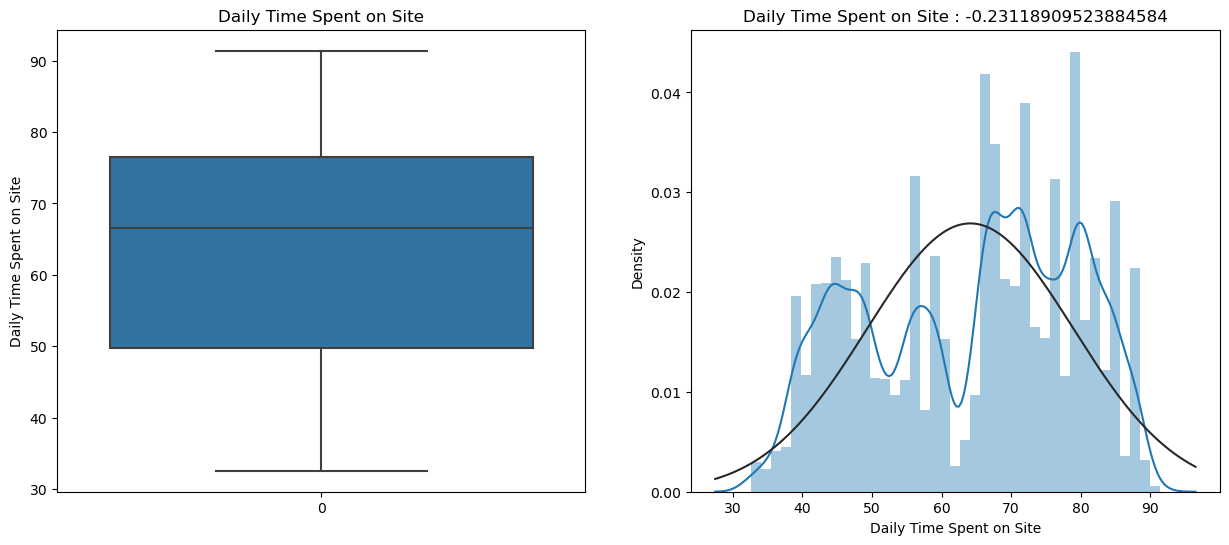

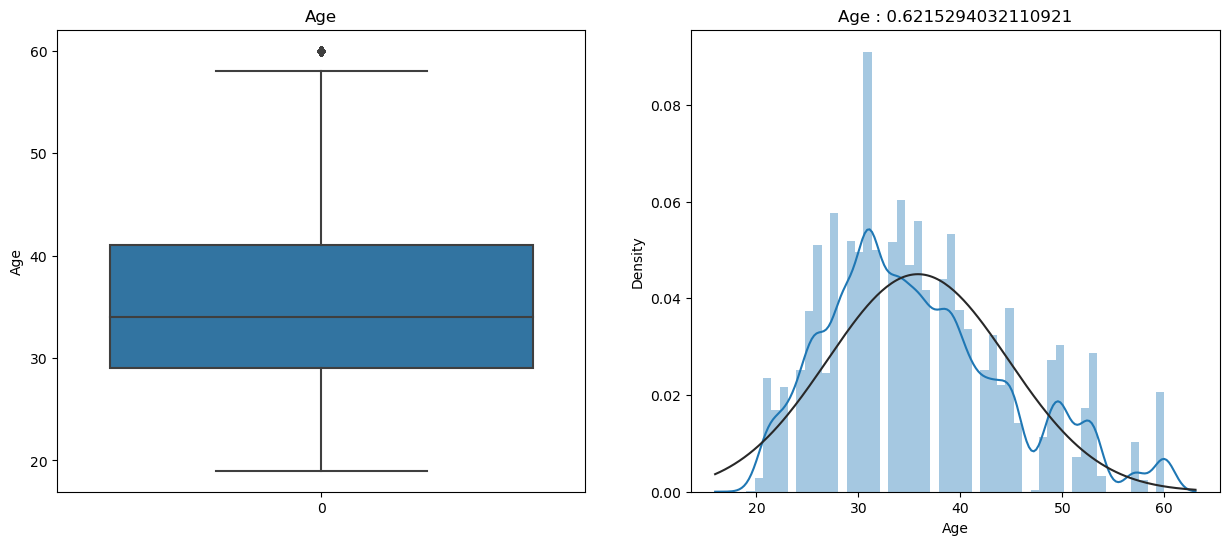

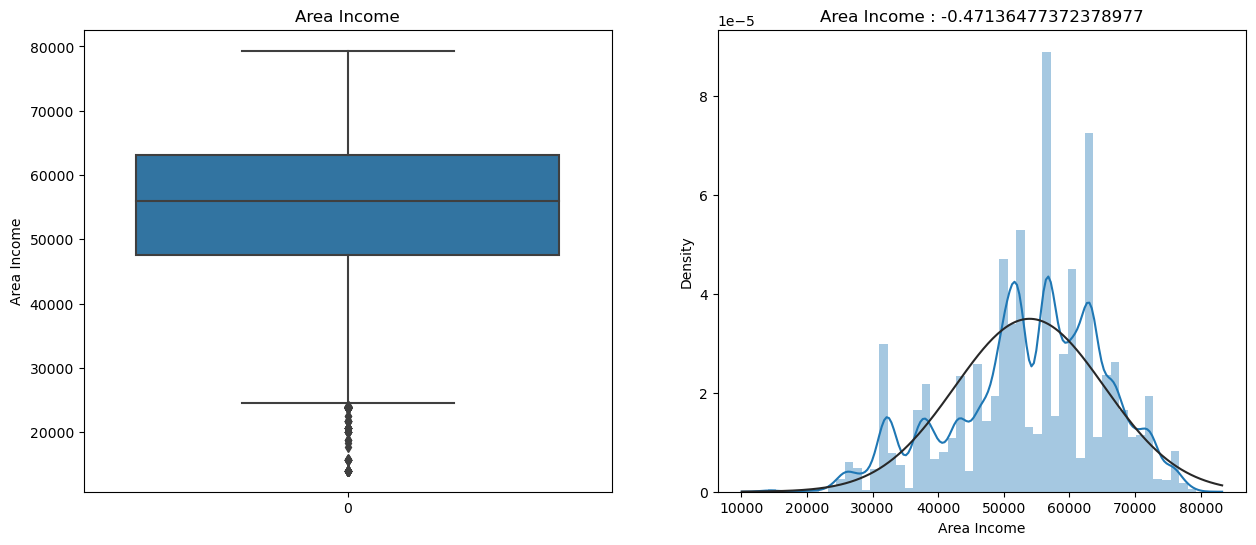

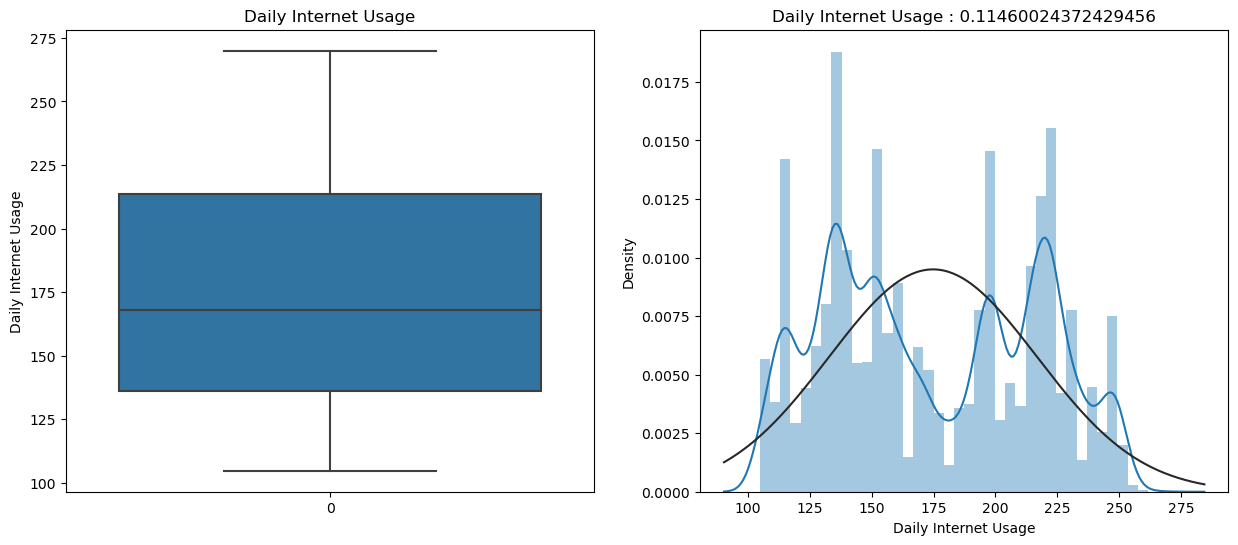

In [14]:
for var in nv:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var],fit = norm)
    ax.set_title(f'{var} : {df[var].skew()}')
    ax.set_xlabel(var)
    
    plt.show()

In [15]:
df1= df.copy()
df1["Clicked on Ad"] = df1["Clicked on Ad"].map({0: "No", 1: "Yes"})

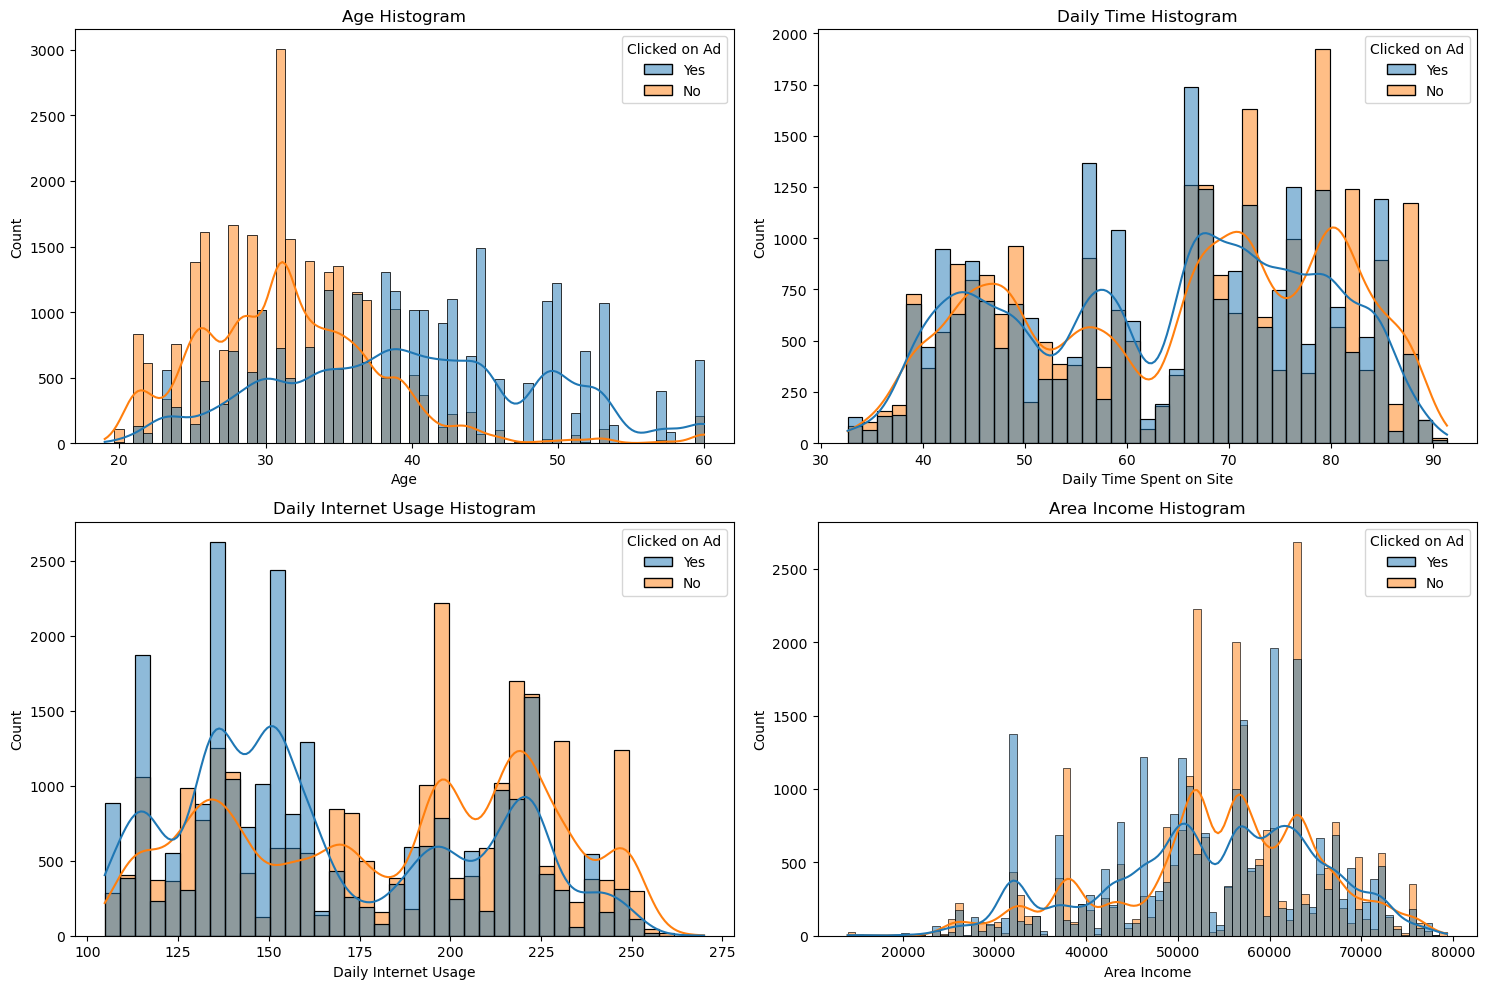

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df1, x="Age", kde=True, hue="Clicked on Ad", ax=axes[0, 0])
axes[0, 0].set_title("Age Histogram")

sns.histplot(data=df1, x="Daily Time Spent on Site", kde=True, hue="Clicked on Ad", ax=axes[0, 1])
axes[0, 1].set_title("Daily Time Histogram")

sns.histplot(data=df1, x="Daily Internet Usage", kde=True, hue="Clicked on Ad", ax=axes[1, 0])
axes[1, 0].set_title("Daily Internet Usage Histogram")

sns.histplot(data=df1, x="Area Income", kde=True, hue="Clicked on Ad", ax=axes[1, 1])
axes[1, 1].set_title("Area Income Histogram")

plt.tight_layout()
plt.show()

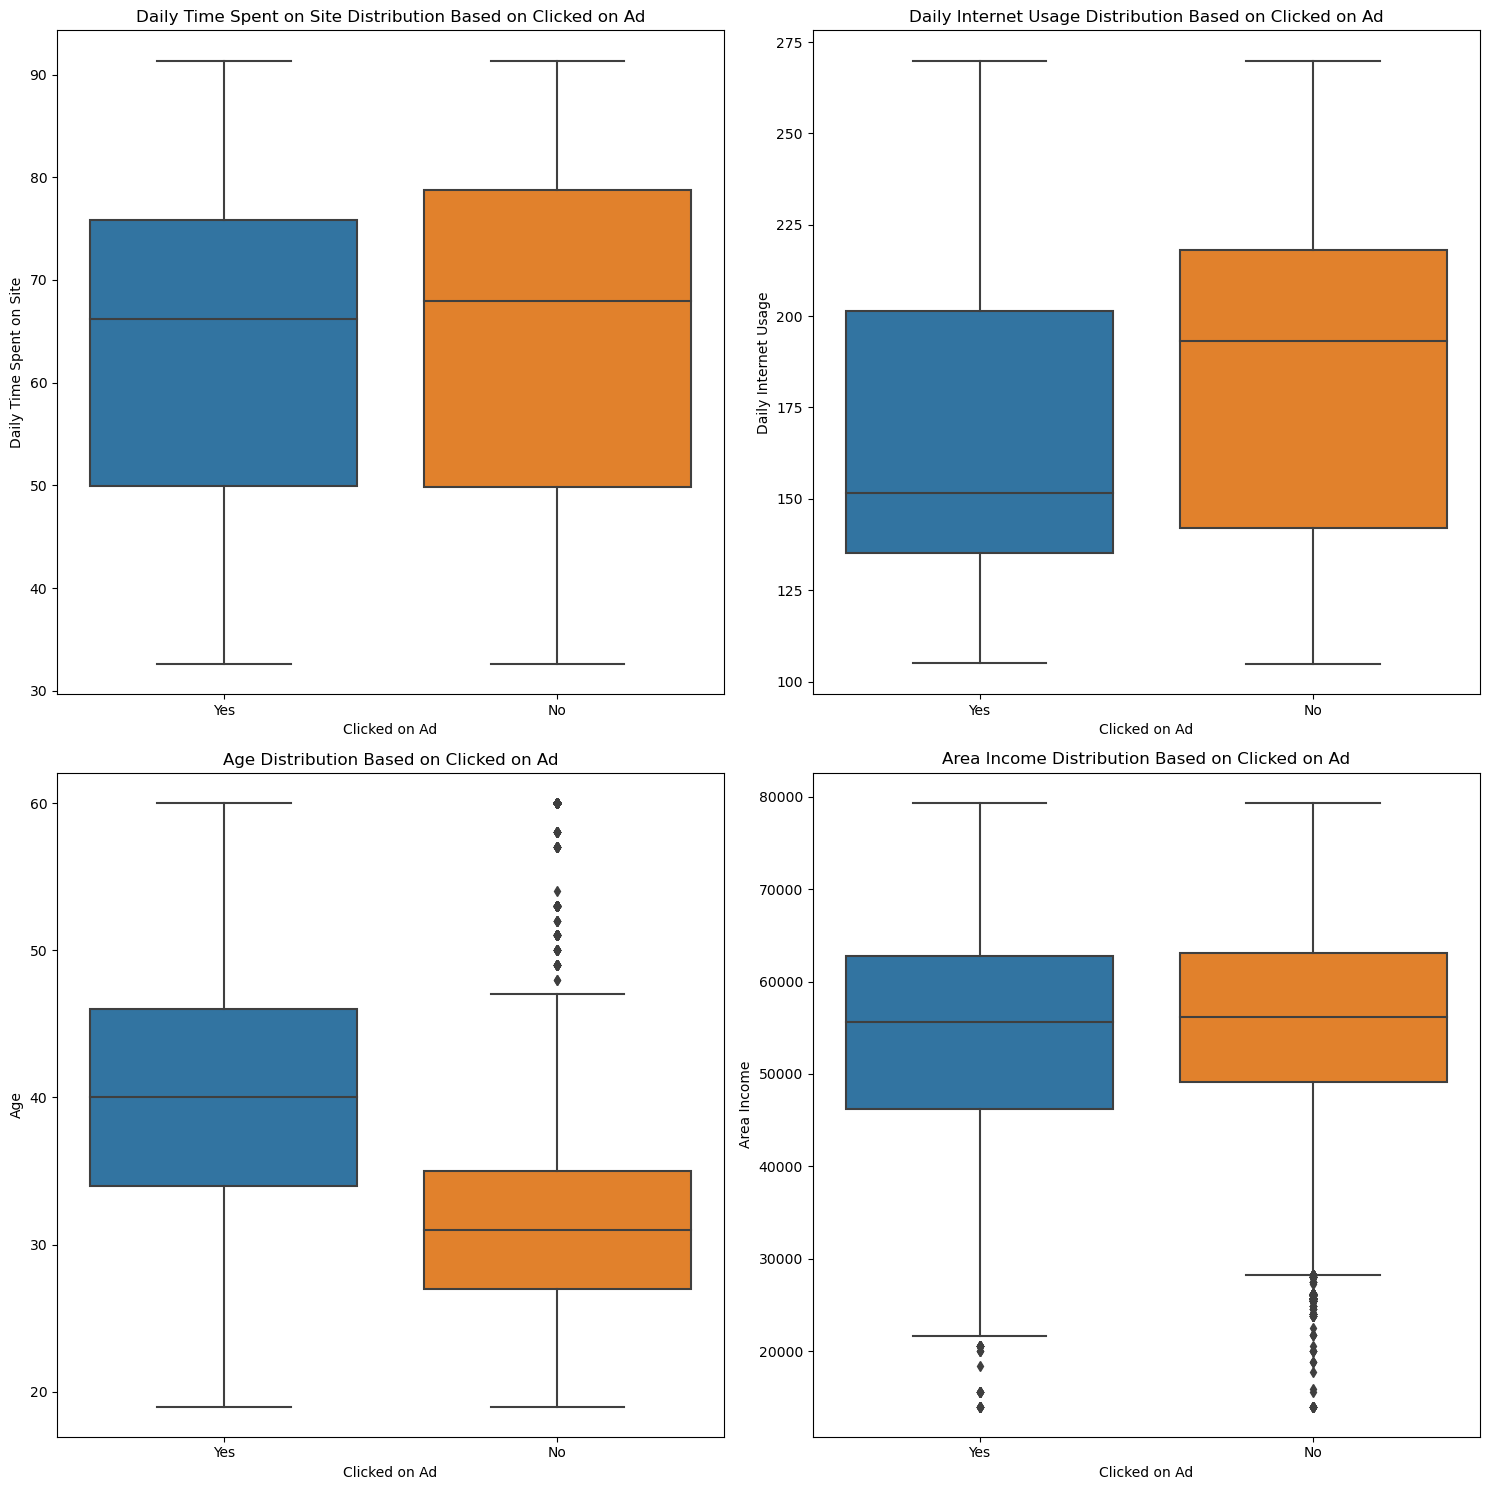

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15,15 ))

sns.boxplot(data=df1, y='Daily Time Spent on Site', x='Clicked on Ad', orient='v', ax=axes[0,0])
axes[0,0].set_title("Daily Time Spent on Site Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Daily Internet Usage', x='Clicked on Ad', orient='v', ax=axes[0,1])
axes[0,1].set_title("Daily Internet Usage Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Age', x='Clicked on Ad', orient='v', ax=axes[1,0])
axes[1,0].set_title("Age Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Area Income', x='Clicked on Ad', orient='v', ax=axes[1,1])
axes[1,1].set_title("Area Income Distribution Based on Clicked on Ad")

plt.tight_layout()
plt.show()

##### Users spending time on site more than an hour have almost equal chances to click and not to click on ad.
##### Users who are using less internet on daily basis have the potential to click on ads.
##### Ads are more likely to be clicked on by users between 35-55.
##### Area Income have negligible effect on ads clicking.

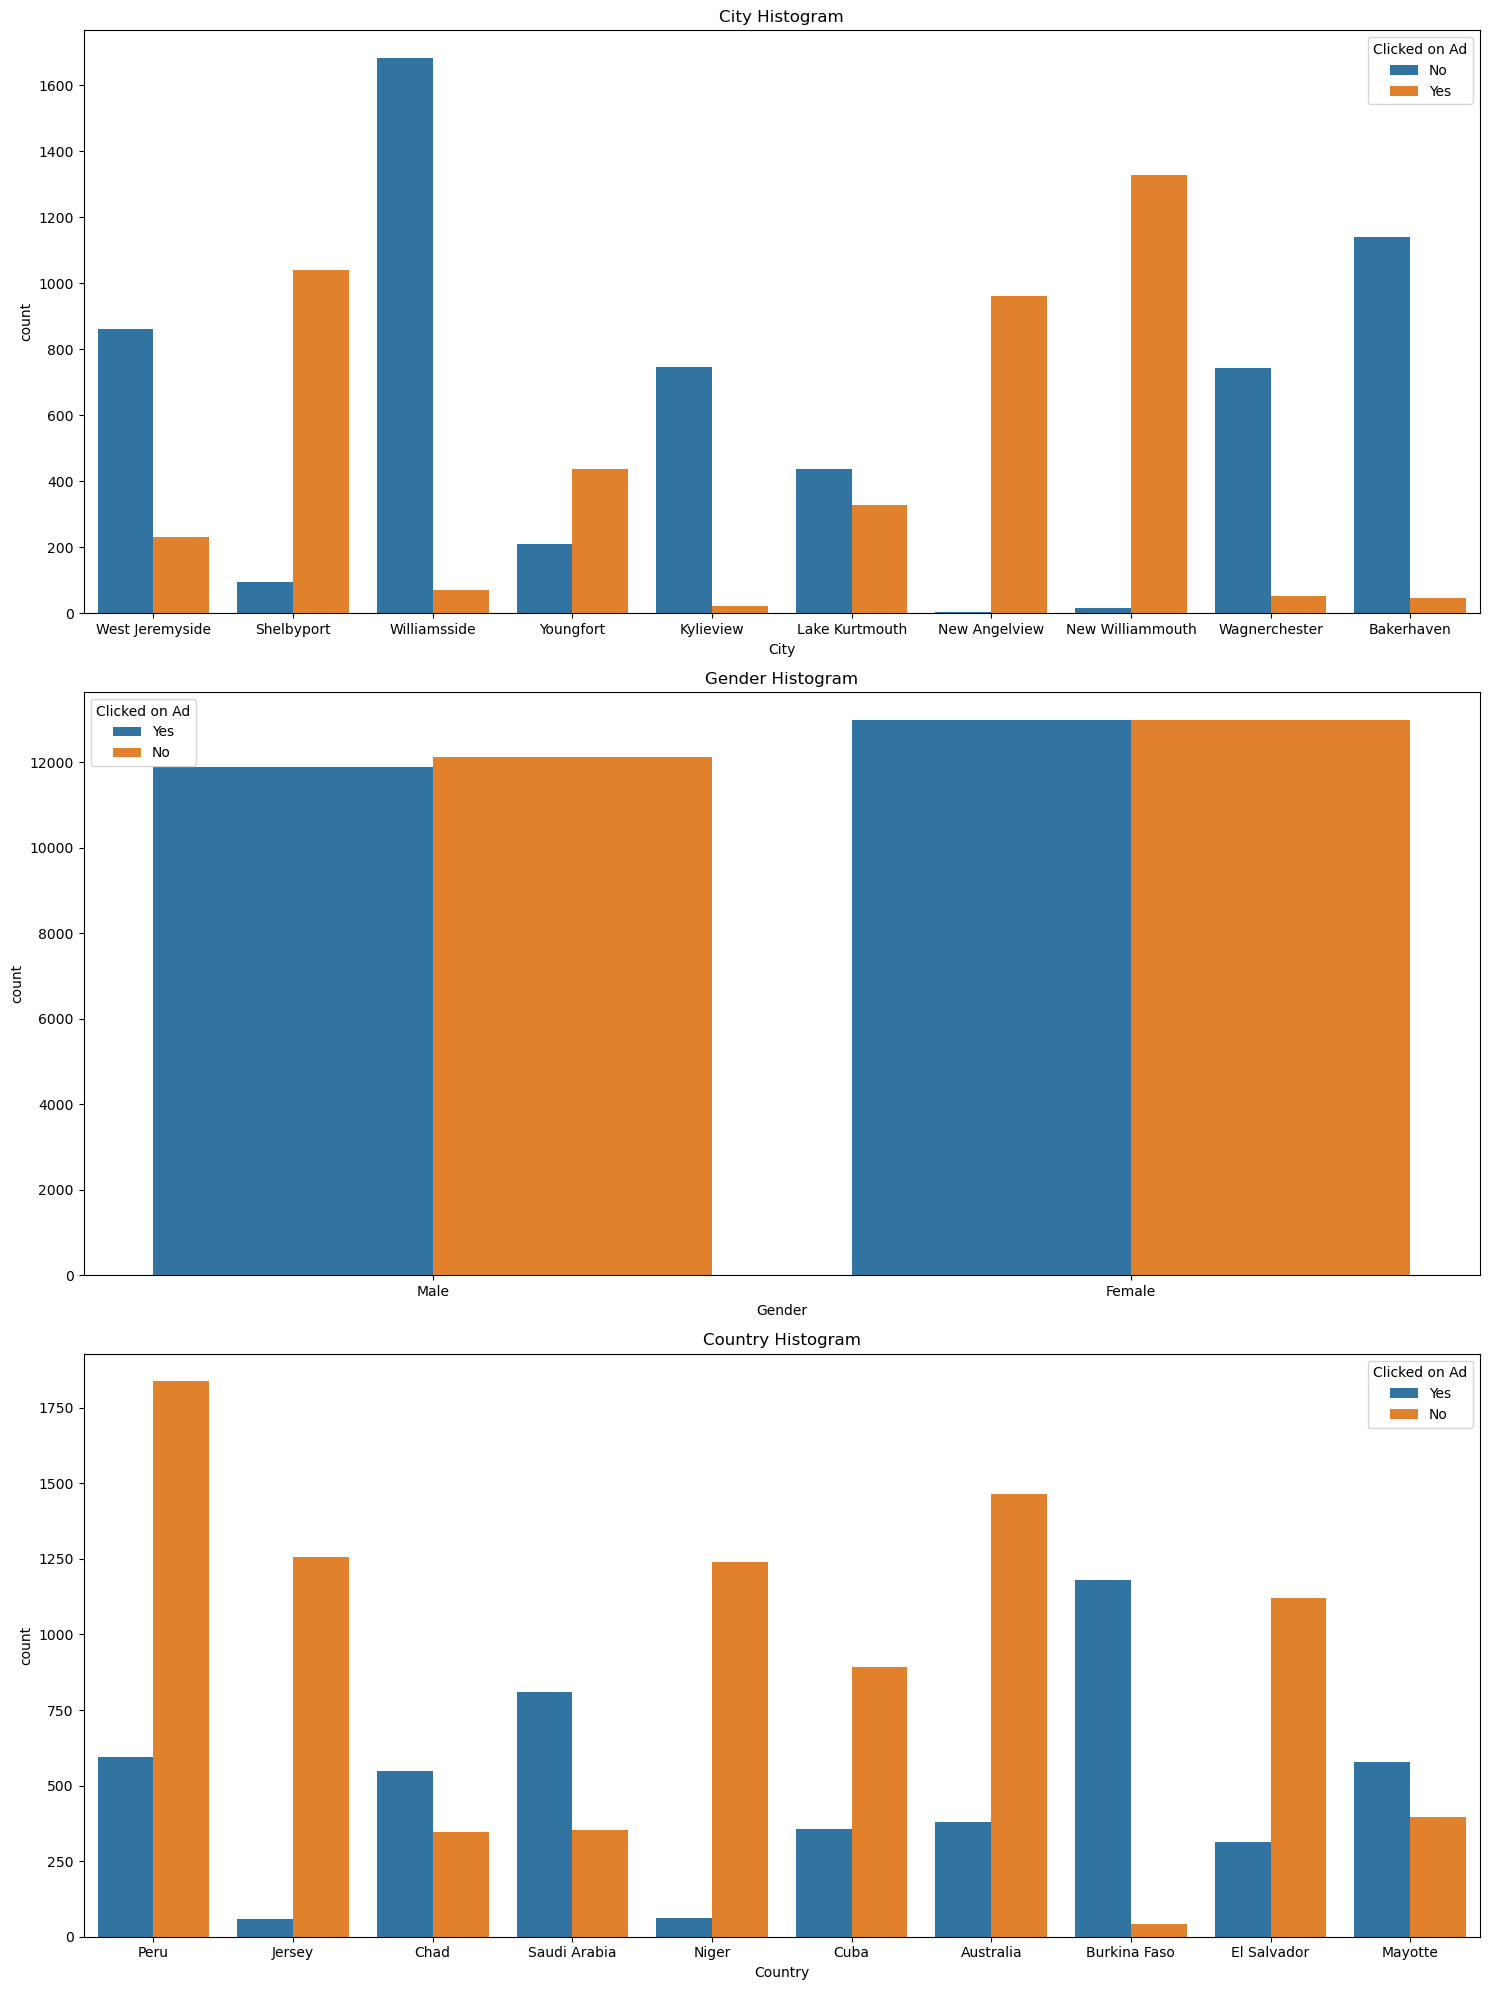

In [18]:
fig, axes = plt.subplots(3, figsize=(15, 20))

top_10_cities = df1['City'].value_counts().nlargest(10).index
sns.countplot(data=df1[df1['City'].isin(top_10_cities)], x="City", hue="Clicked on Ad", ax=axes[0])
axes[0].set_title("City Histogram")

sns.countplot(data=df1, x="Gender", hue="Clicked on Ad", ax=axes[1])
axes[1].set_title("Gender Histogram")

top_10_countries = df1['Country'].value_counts().nlargest(10).index
sns.countplot(data=df1[df1['Country'].isin(top_10_countries)], x="Country", hue="Clicked on Ad", ax=axes[2])
axes[2].set_title("Country Histogram")

plt.tight_layout()
plt.show()

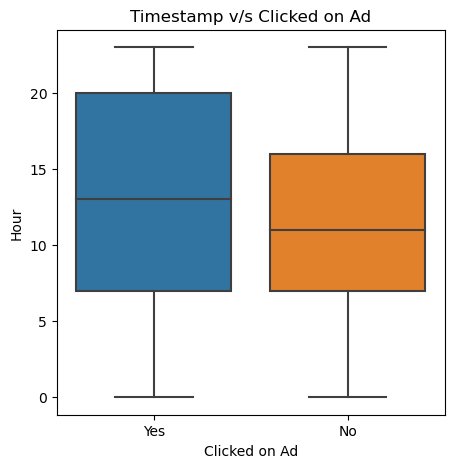

In [19]:
df1['Timestamp'] = pd.to_datetime(ad['Timestamp'])
df1['Hour'] = df1['Timestamp'].dt.hour #timestamp
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.boxplot(x=df1['Clicked on Ad'], y=df1['Hour'])
ax.set_title('Timestamp v/s Clicked on Ad')
plt.show()

In [20]:
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,Yes,3
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,No,16
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,Yes,7
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,Yes,21
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,No,18
...,...,...,...,...,...,...,...,...,...,...,...
49995,56.64,37.0,64011.26,124.34,Networked stable open architecture,Hatfieldshire,Male,Korea,2016-03-06 23:26:44,Yes,23
49996,78.36,42.0,60812.77,145.98,Customizable 6thgeneration knowledge user,Christinehaven,Male,Malta,2016-06-26 07:01:47,Yes,7
49997,38.35,33.0,51512.66,226.54,Total cohesive moratorium,Elizabethport,Female,Lebanon,2016-02-17 23:47:00,Yes,23
49998,75.84,36.0,50971.73,218.17,Enhanced asymmetric installation,West Steven,Male,Qatar,2016-06-12 11:17:25,Yes,11


In [21]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0
...,...,...,...,...,...,...,...,...,...,...
49995,56.64,37.0,64011.26,124.34,Networked stable open architecture,Hatfieldshire,Male,Korea,2016-03-06 23:26:44,1
49996,78.36,42.0,60812.77,145.98,Customizable 6thgeneration knowledge user,Christinehaven,Male,Malta,2016-06-26 07:01:47,1
49997,38.35,33.0,51512.66,226.54,Total cohesive moratorium,Elizabethport,Female,Lebanon,2016-02-17 23:47:00,1
49998,75.84,36.0,50971.73,218.17,Enhanced asymmetric installation,West Steven,Male,Qatar,2016-06-12 11:17:25,1


In [22]:
df1["Clicked on Ad"] = df1["Clicked on Ad"].map({"No":0, "Yes":1})
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1,3
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0,16
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1,7
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1,21
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0,18
...,...,...,...,...,...,...,...,...,...,...,...
49995,56.64,37.0,64011.26,124.34,Networked stable open architecture,Hatfieldshire,Male,Korea,2016-03-06 23:26:44,1,23
49996,78.36,42.0,60812.77,145.98,Customizable 6thgeneration knowledge user,Christinehaven,Male,Malta,2016-06-26 07:01:47,1,7
49997,38.35,33.0,51512.66,226.54,Total cohesive moratorium,Elizabethport,Female,Lebanon,2016-02-17 23:47:00,1,23
49998,75.84,36.0,50971.73,218.17,Enhanced asymmetric installation,West Steven,Male,Qatar,2016-06-12 11:17:25,1,11


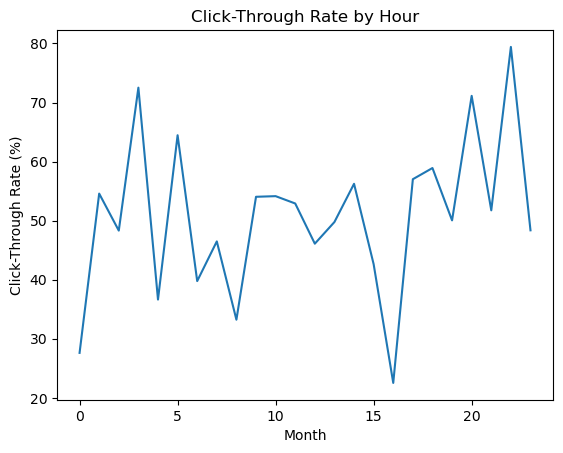

In [23]:
filtered_ad = df1[df1['Clicked on Ad'] == 1]

# Calculate CTR for each month
hourly_ctr = filtered_ad.groupby(df1['Hour'])['Clicked on Ad'].count() / df1.groupby(df1['Hour'])['Clicked on Ad'].count()*100

hourly_ctr=hourly_ctr.reset_index()

sns.lineplot(x='Hour',y='Clicked on Ad', data=hourly_ctr, palette='Set2')

plt.title('Click-Through Rate by Hour')
plt.xlabel('Month')
plt.ylabel('Click-Through Rate (%)')

plt.show()

The potential users to click on ads and have high purchase conversions at 03:00, 05.00, 20.00, and 22.00.

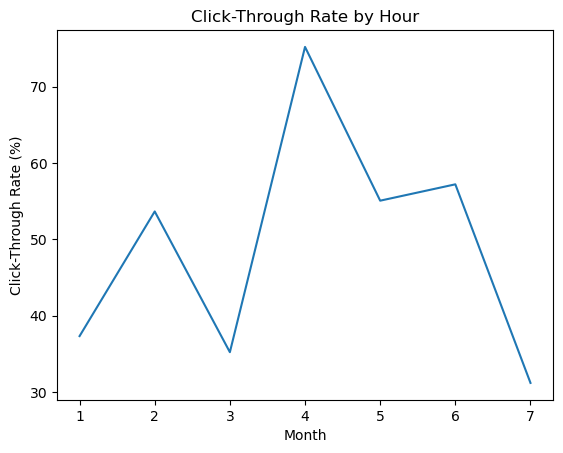

In [24]:
df1['Timestamp'] = pd.to_datetime(ad['Timestamp'])
df1['Month'] = df1['Timestamp'].dt.month 

# Calculate CTR for each month
monthly_ctr = filtered_ad.groupby(df1['Month'])['Clicked on Ad'].count() / df1.groupby(df1['Month'])['Clicked on Ad'].count()*100

monthly_ctr=monthly_ctr.reset_index()

sns.lineplot(x='Month',y='Clicked on Ad', data=monthly_ctr, palette='Set2')

plt.title('Click-Through Rate by Hour')
plt.xlabel('Month')
plt.ylabel('Click-Through Rate (%)')

plt.show()

Alternative months like in Feb, April, June have the highest number of ad click.

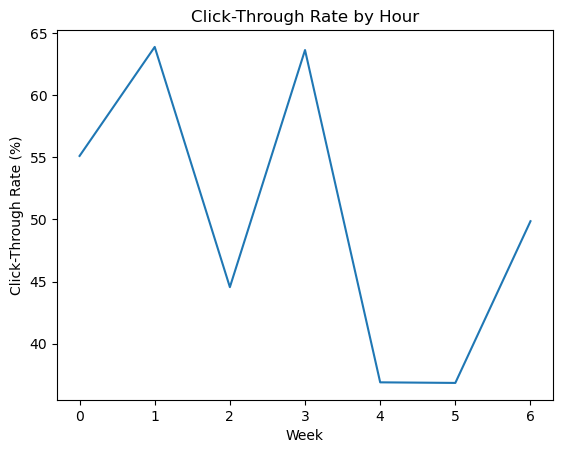

In [25]:
df1['Timestamp'] = pd.to_datetime(ad['Timestamp'])
df1['Week'] = df1['Timestamp'].dt.dayofweek

weekly_ctr = filtered_ad.groupby(df1['Week'])['Clicked on Ad'].count() / df1.groupby(df1['Week'])['Clicked on Ad'].count()*100

weekly_ctr=weekly_ctr.reset_index()

sns.lineplot(x='Week',y='Clicked on Ad', data=weekly_ctr, palette='Set2')

plt.title('Click-Through Rate by Hour')
plt.xlabel('Week')
plt.ylabel('Click-Through Rate (%)')

plt.show()

Tuesday, Thursday have high ctr as compared to other days.

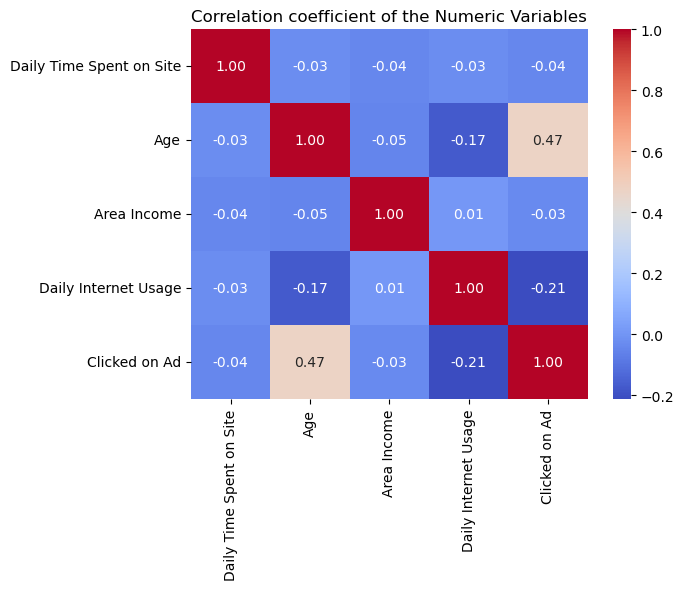

In [26]:
sns.heatmap(df.corr(),annot=True,cbar=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation coefficient of the Numeric Variables')
plt.show()

There is no correlation between any independent variables.

# Feature Engineering

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  50000 non-null  float64       
 1   Age                       50000 non-null  float64       
 2   Area Income               50000 non-null  float64       
 3   Daily Internet Usage      50000 non-null  float64       
 4   Ad Topic Line             50000 non-null  object        
 5   City                      50000 non-null  object        
 6   Gender                    50000 non-null  object        
 7   Country                   50000 non-null  object        
 8   Timestamp                 50000 non-null  datetime64[ns]
 9   Clicked on Ad             50000 non-null  int64         
 10  Hour                      50000 non-null  int64         
 11  Month                     50000 non-null  int64         
 12  Week              

In [28]:
df1 = df1.astype({"Timestamp": object})

In [29]:
categorical_variables=df1.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']


In [30]:
df1['Gender'] = df1['Gender'].map({'Female':1,'Male':0})

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  50000 non-null  float64
 1   Age                       50000 non-null  float64
 2   Area Income               50000 non-null  float64
 3   Daily Internet Usage      50000 non-null  float64
 4   Ad Topic Line             50000 non-null  object 
 5   City                      50000 non-null  object 
 6   Gender                    50000 non-null  int64  
 7   Country                   50000 non-null  object 
 8   Timestamp                 50000 non-null  object 
 9   Clicked on Ad             50000 non-null  int64  
 10  Hour                      50000 non-null  int64  
 11  Month                     50000 non-null  int64  
 12  Week                      50000 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [32]:
x = df1.drop(columns='Clicked on Ad').copy()  
y = df1['Clicked on Ad'].copy()

x.drop(columns = ['Ad Topic Line', 'City', 'Country','Timestamp'], inplace=True)

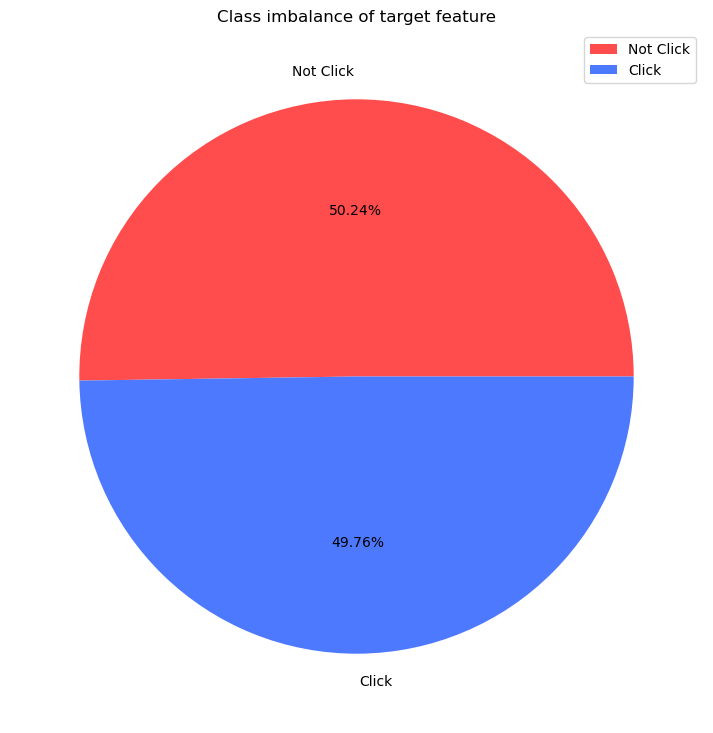

In [33]:
labels = ['Not Click', 'Click'] 
size = df1['Clicked on Ad'].value_counts() 
colors = ['#ff4d4d', '#4d79ff']  
plt.figure(figsize=(9,9)) 
plt.pie(size, colors=colors, labels=labels,autopct='%.2f%%')
plt.axis('off') 
plt.title("Class imbalance of target feature") 
plt.legend()
plt.show()

No class imbalance

In [34]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
print(f'Shape of X_train : {x_train.shape}')
print(f'Shape of X_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (35000, 8)
Shape of X_test : (15000, 8)
Shape of y_train : (35000,)
Shape of y_test : (15000,)


In [36]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Hour,Month,Week
38094,79.53,34.0,58633.63,135.24,0,13,7,3
40624,56.64,28.0,60637.62,218.17,1,22,2,1
49425,79.54,39.0,55787.58,134.46,1,18,7,0
35734,48.73,32.0,52340.10,211.12,0,5,3,1
41708,71.33,40.0,31947.65,132.07,0,9,4,5


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modeling

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
def result_summarizer_for_train(y_train,y_train_pred):
    
    print('Training set evaluation result :\n')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    
    print("Accuracy: ", accuracy_train*100)
    print("Precision: ", precision_train*100)
    print("Recall: ", recall_train*100)
    print("F1 Score: ", f1_train*100)
    print("roc_auc_score: ", roc_auc_score_train*100)

In [40]:
def result_summarizer_for_test(y_test,y_test_pred):
    
    print('Test set evaluation result :\n')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    
    print("Accuracy: ", accuracy_test*100)
    print("Precision: ", precision_test*100)
    print("Recall: ", recall_test*100)
    print("F1 Score: ", f1_test*100)
    print("roc_auc_score: ", roc_auc_score_test*100)

In [41]:
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_train_pred)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0], fmt='d', cmap='Blues')
    ax1.set_title('Confusion Matrix for Training Set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred)
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[1], fmt='d', cmap='Blues')
    ax2.set_title('Confusion Matrix for Test Set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')

    plt.show()

In [42]:
def plot_roc_curve(y_test, y_pred,y_pred_prob):
    
    y_test = y_test.ravel()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob)
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

### **<u> Logistic Regression </u>**

In [43]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train_scaled, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(x_train_scaled)
y_test_pred_lr = model_lr.predict(x_test_scaled)
y_pred_prob_lr = model_lr.predict_proba(x_test_scaled)

y_pred_prob_lr = y_pred_prob_lr[:, 1]

LogisticRegression()


In [44]:
result_summarizer_for_train(y_train,y_train_pred_lr)

Training set evaluation result :

Accuracy:  73.81428571428572
Precision:  74.97589199614272
Recall:  71.2771443304876
F1 Score:  73.07974739315611
roc_auc_score:  73.8074899289641


In [45]:
result_summarizer_for_test(y_test,y_test_pred_lr)

Test set evaluation result :

Accuracy:  73.81333333333333
Precision:  74.51337347710405
Recall:  71.62471395881008
F1 Score:  73.04049416609472
roc_auc_score:  73.7928087030875


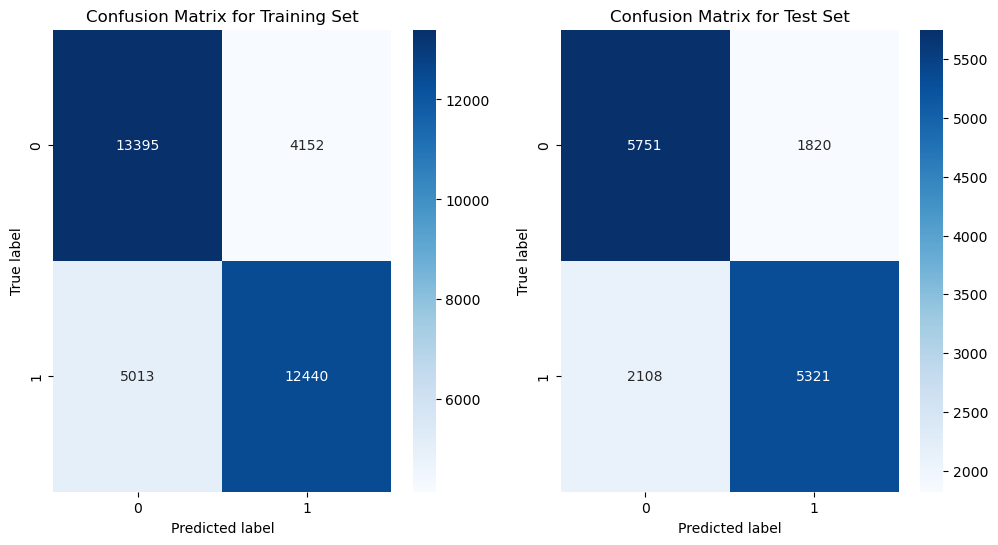

In [46]:
visualize(y_train, y_train_pred_lr, y_test, y_test_pred_lr)

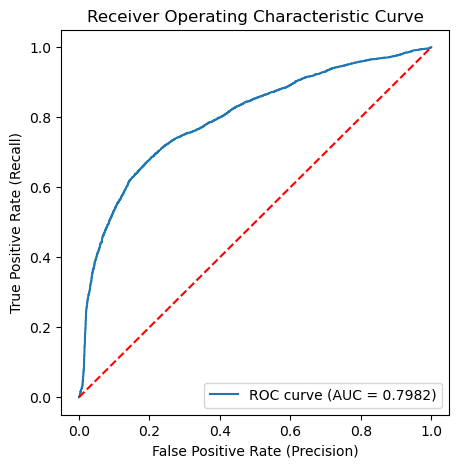

In [47]:
plot_roc_curve(y_test, y_test_pred_lr,y_pred_prob_lr)

### **<u>Naive Bayes</u>**

In [48]:
from sklearn.naive_bayes import GaussianNB  

model_nb = GaussianNB()  
model_nb.fit(x_train_scaled, y_train)
print(model_nb)

y_train_pred_nb = model_nb.predict(x_train_scaled)
y_test_pred_nb = model_nb.predict(x_test_scaled)
y_pred_prob_nb = model_nb.predict_proba(x_test_scaled)

y_pred_prob_nb = y_pred_prob_nb[:, 1]

GaussianNB()


In [49]:
result_summarizer_for_train(y_train,y_train_pred_nb)

Training set evaluation result :

Accuracy:  74.91142857142857
Precision:  79.54886193267004
Recall:  66.8824843866384
F1 Score:  72.6678494724064
roc_auc_score:  74.88992287947637


In [50]:
result_summarizer_for_test(y_test,y_test_pred_nb)

Test set evaluation result :

Accuracy:  75.02666666666667
Precision:  79.18846092883183
Recall:  67.2499663480953
F1 Score:  72.73256660358132
roc_auc_score:  74.95373763184715


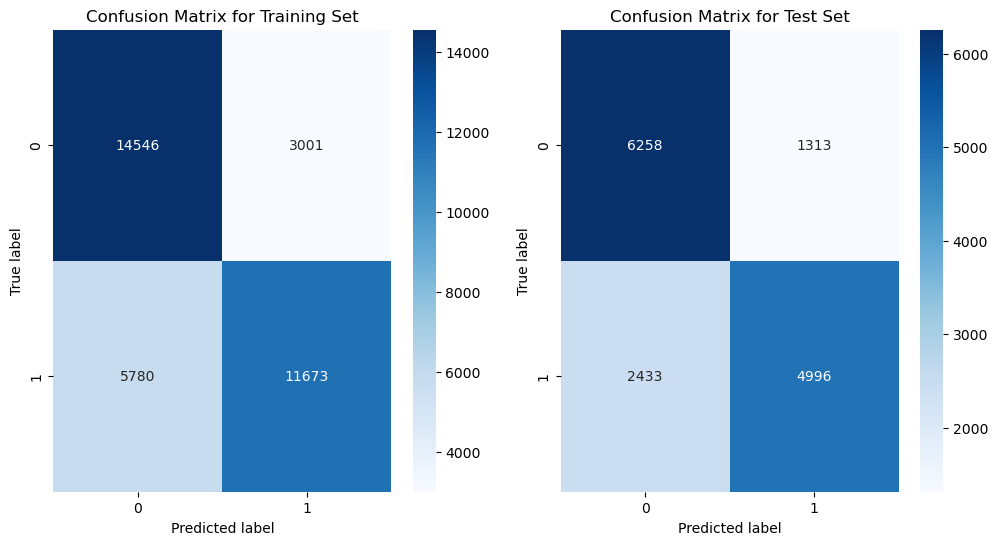

In [51]:
visualize(y_train, y_train_pred_nb, y_test, y_test_pred_nb)

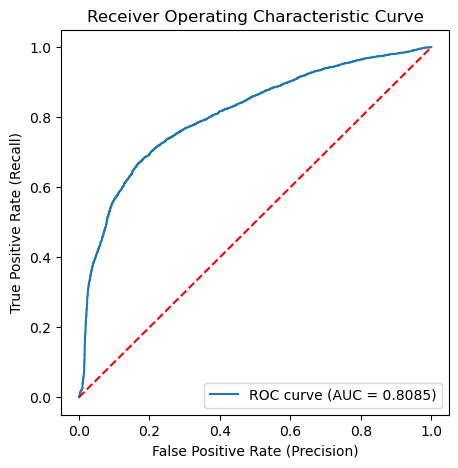

In [52]:
plot_roc_curve(y_test, y_test_pred_nb,y_pred_prob_nb)

### **<u> Decision Tree </u>**

#### **Pre-prunning**

<Axes: >

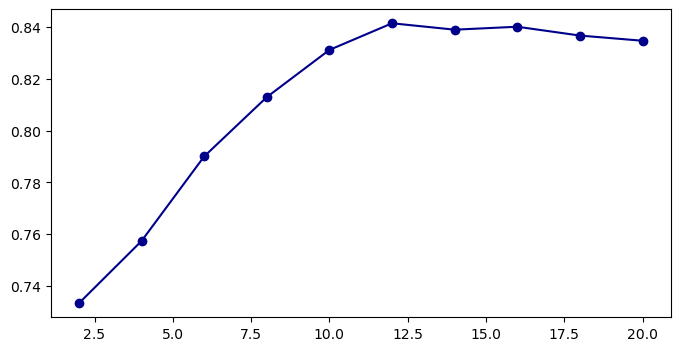

In [53]:
from sklearn.tree import DecisionTreeClassifier  

# Checking Max Depth
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model_dt = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkblue",marker="o")

<Axes: >

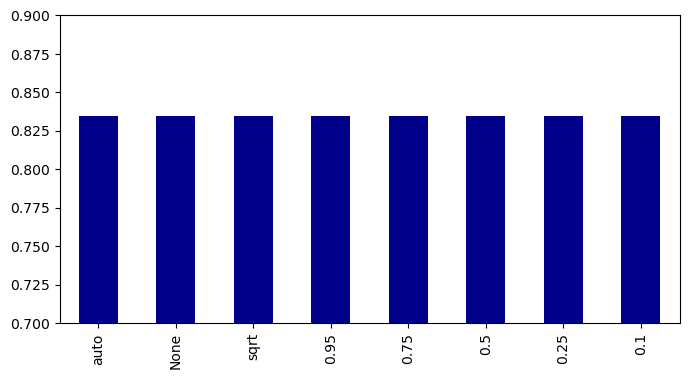

In [54]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkblue",ylim=(0.7,0.9))

<Axes: >

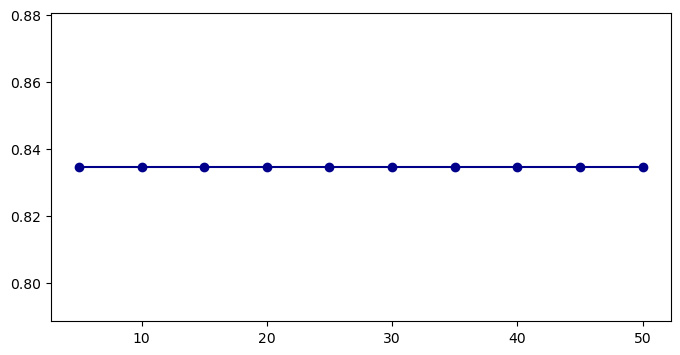

In [55]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkblue",marker="o")

In [56]:
model_dt= DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = 15,criterion='entropy')   
model_dt.fit(x_train, y_train)
print(model_dt)

y_train_pred_dt = model_dt.predict(x_train)
y_test_pred_dt = model_dt.predict(x_test)
y_pred_prob_dt = model_dt.predict_proba(x_test)

y_pred_prob_dt = y_pred_prob_dt[:, 1]

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=15,
                       random_state=101)


In [57]:
result_summarizer_for_train(y_train,y_train_pred_dt)

Training set evaluation result :

Accuracy:  85.22857142857143
Precision:  87.4778788063709
Recall:  82.1348765255257
F1 Score:  84.72222222222221
roc_auc_score:  85.2202849032142


In [58]:
result_summarizer_for_test(y_test,y_test_pred_dt)

Test set evaluation result :

Accuracy:  83.52000000000001
Precision:  85.40208541636909
Recall:  80.48189527527259
F1 Score:  82.86902286902288
roc_auc_score:  83.49150899016567


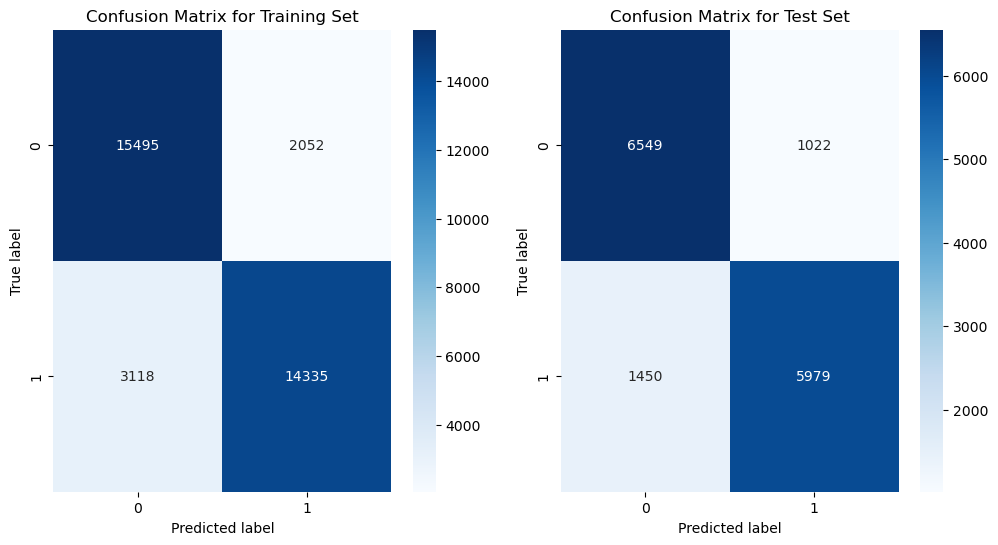

In [59]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_dt)

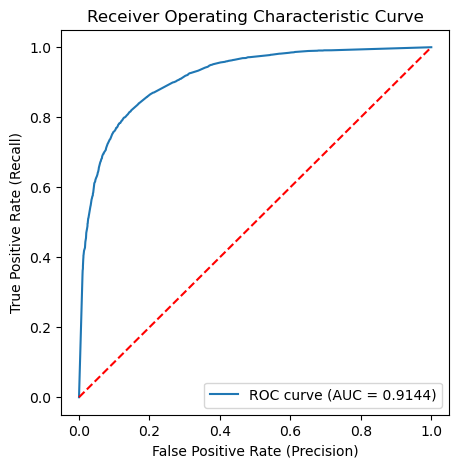

In [60]:
plot_roc_curve(y_test, y_test_pred_dt,y_pred_prob_dt)

### **<u> Random Forest </u>**

<Axes: >

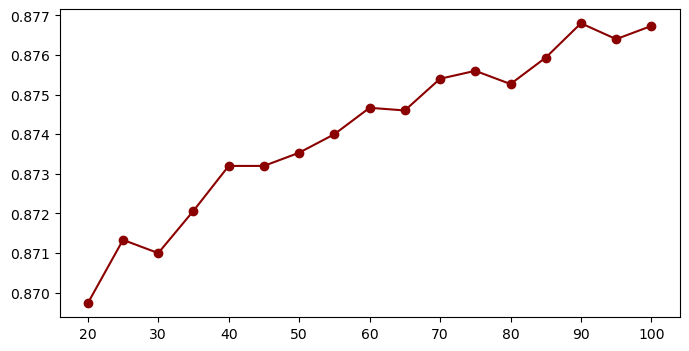

In [61]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimator_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimator_options:
    model_rf = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color="darkred",marker="o")

<Axes: >

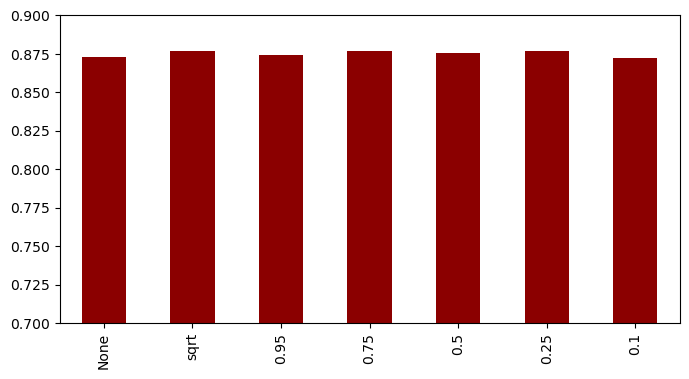

In [62]:
results = []
max_features_options = [None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<Axes: >

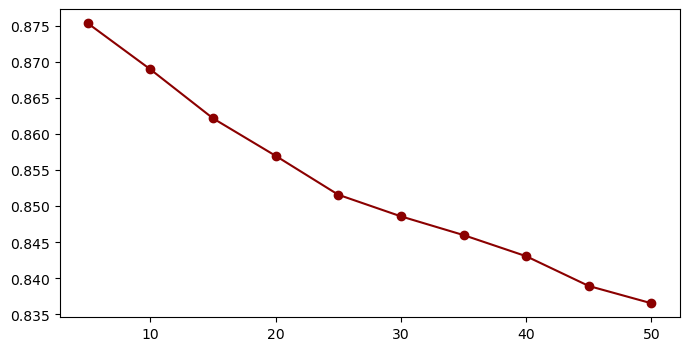

In [63]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [64]:
model_rf= RandomForestClassifier(n_estimators=95, oob_score=True, n_jobs=-1, random_state=101, max_features = 'sqrt', min_samples_leaf = 1)
model_rf.fit(x_train, y_train)
print(model_rf)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)
y_pred_prob_rf = model_rf.predict_proba(x_test)

y_pred_prob_rf = y_pred_prob_rf[:, 1]

RandomForestClassifier(n_estimators=95, n_jobs=-1, oob_score=True,
                       random_state=101)


In [65]:
result_summarizer_for_train(y_train,y_train_pred_rf)

Training set evaluation result :

Accuracy:  98.43142857142857
Precision:  98.49667202203351
Recall:  98.35558356729503
F1 Score:  98.42607723402426
roc_auc_score:  98.43122541902677


In [66]:
result_summarizer_for_test(y_test,y_test_pred_rf)

Test set evaluation result :

Accuracy:  87.64
Precision:  87.29096989966555
Recall:  87.83147126127339
F1 Score:  87.56038647342994
roc_auc_score:  87.64179559629511


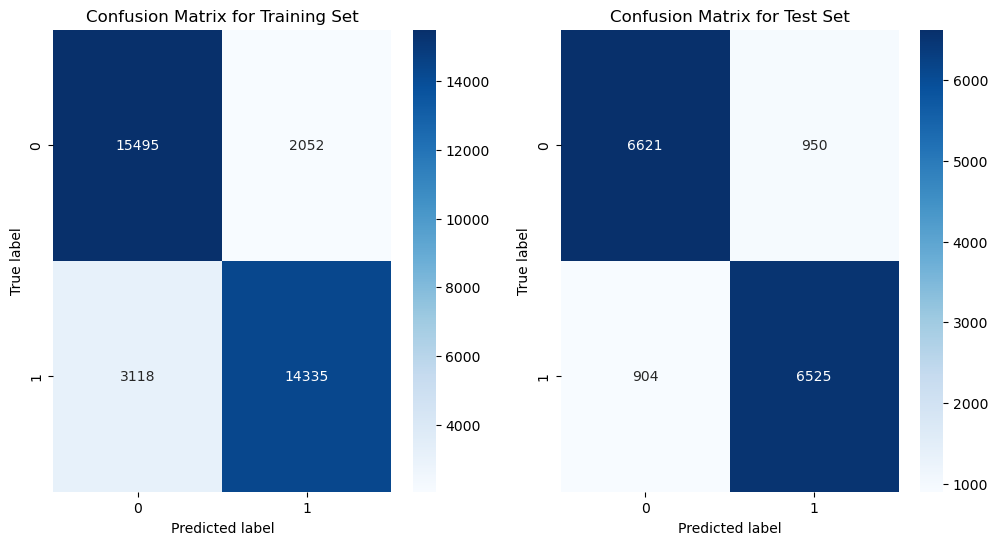

In [67]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_rf)

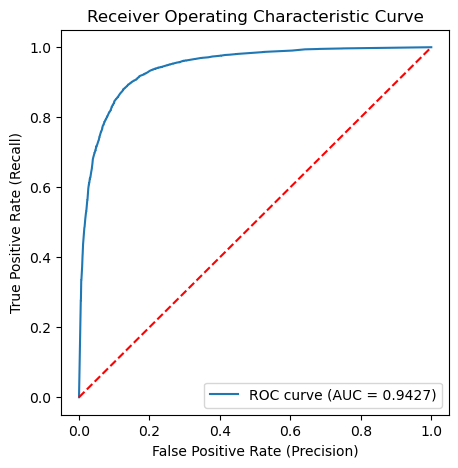

In [68]:
plot_roc_curve(y_test, y_test_pred_rf,y_pred_prob_rf)

### **<u> K- Nearest Neighbour </u>**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,51):    
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train_scaled,y_train)
    y_test_pred_knn = model_knn.predict(x_test_scaled)
    error_rate.append(np.mean(y_test_pred_knn != y_test))

Text(0, 0.5, 'Error Rate')

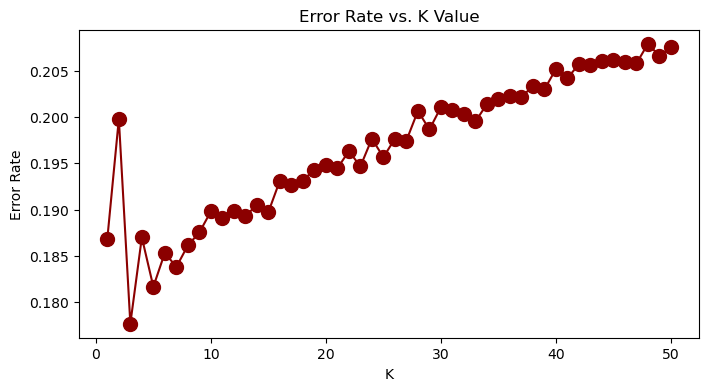

In [70]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_scaled,y_train)
print(model_knn)

y_train_pred_knn= model_knn.predict(x_train_scaled)
y_test_pred_knn= model_knn.predict(x_test_scaled)
y_pred_prob_knn= model_knn.predict_proba(x_test_scaled)

y_pred_prob_knn = y_pred_prob_knn[:, 1]

KNeighborsClassifier(n_neighbors=3)


In [72]:
result_summarizer_for_train(y_train,y_train_pred_knn)

Training set evaluation result :

Accuracy:  89.34285714285714
Precision:  89.20633106679618
Recall:  89.45167019996563
F1 Score:  89.32883217943582
roc_auc_score:  89.34314860086616


In [73]:
result_summarizer_for_test(y_test,y_test_pred_knn)

Test set evaluation result :

Accuracy:  82.23333333333333
Precision:  82.09377526273242
Recall:  82.01642212949253
F1 Score:  82.0550804659619
roc_auc_score:  82.23129916407264


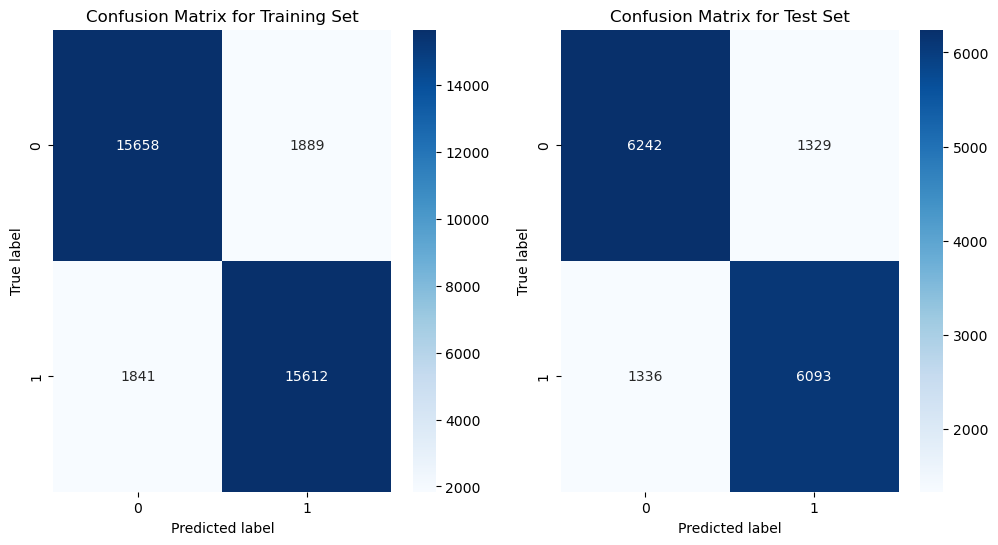

In [74]:
visualize(y_train, y_train_pred_knn, y_test, y_test_pred_knn)

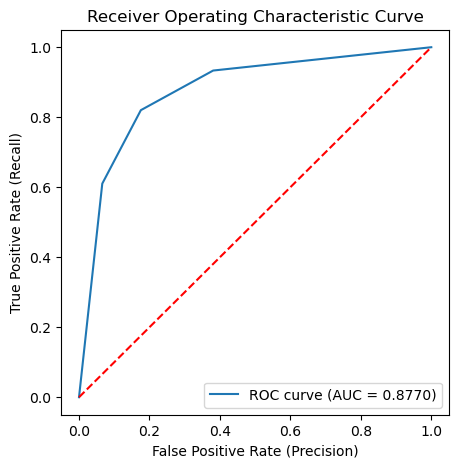

In [75]:
plot_roc_curve(y_test, y_test_pred_knn,y_pred_prob_knn)

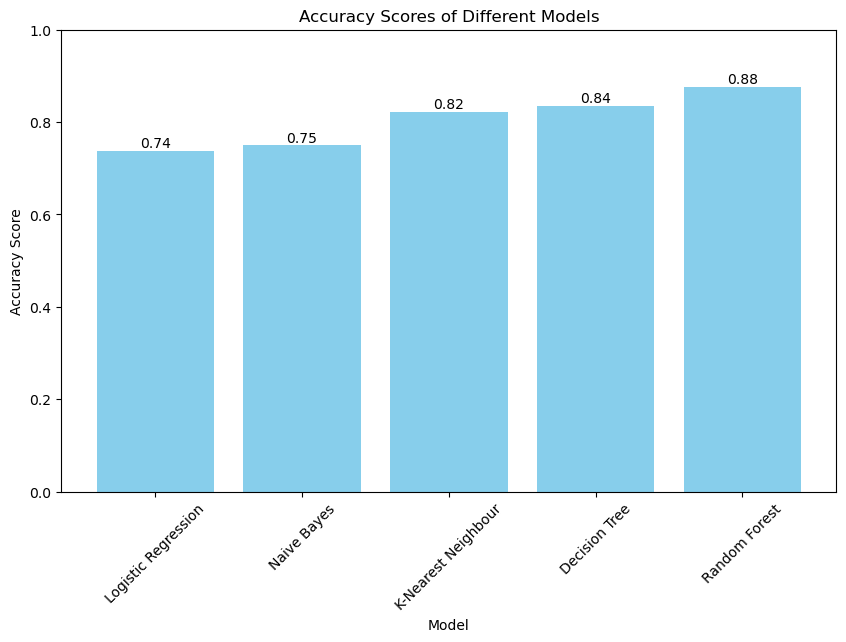

In [76]:
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest']
accuracy_scores = [accuracy_lr,accuracy_nb,accuracy_knn,accuracy_dt,accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy scores)

# Display the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [77]:
y_test = y_test.ravel()

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate the Area Under the Curve (AUC)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

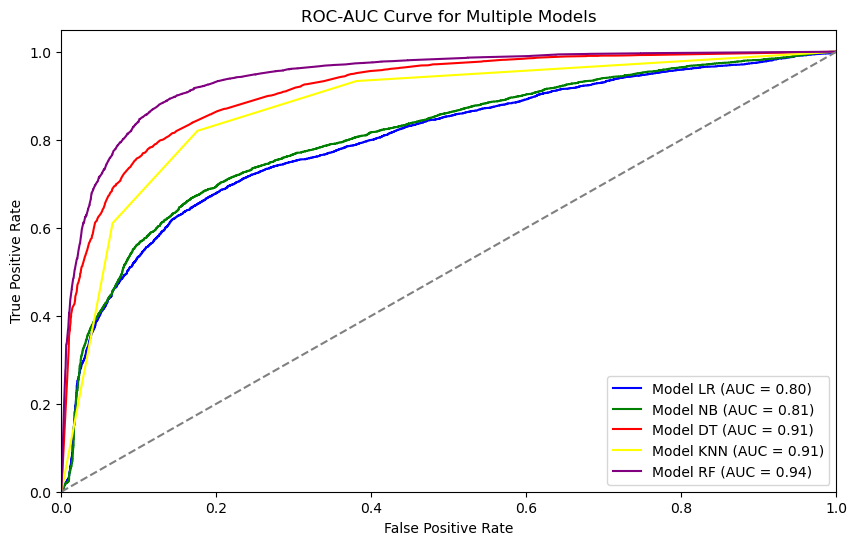

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Model LR (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Model NB (AUC = {auc_nb:.2f})', color='green')
plt.plot(fpr_dt, tpr_dt, label=f'Model DT (AUC = {auc_dt:.2f})', color='red')
plt.plot(fpr_knn, tpr_knn, label=f'Model KNN (AUC = {auc_dt:.2f})', color='yellow')
plt.plot(fpr_rf, tpr_rf, label=f'Model RF (AUC = {auc_rf:.2f})', color='purple')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multiple Models')
plt.legend()
plt.show()